In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
np.random.seed(777)
import math
import keras
import keras.backend as K
import h5py
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, add, GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score
from keras.regularizers import l2
from keras.applications.xception import Xception, preprocess_input
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import DenseNet201
from keras.applications import DenseNet121

from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Lambda,Concatenate
from keras.layers import SeparableConv2D, AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Add

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

Using TensorFlow backend.


In [15]:
train_dir = 'data/iciar/train/'
test_dir = "data/iciar/test/"

extracted_features_dir = "extracted_features/"
model_name = "iciar_Xception"

In [16]:
import keras
import tensorflow as tf
import keras.backend as K

print("Keras Version", keras.__version__)
print("tensorflow Version", tf.__version__)
print("dim_ordering:", K.image_dim_ordering())

Keras Version 2.2.4
tensorflow Version 1.10.0
dim_ordering: tf


In [17]:
batch_size = 32
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)
epochs = 1000

In [18]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))

print("*"*30)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

data/iciar/train/ 0
data/iciar/train/carcinoma 2310
data/iciar/train/non-carcinoma 2310
******************************
data/iciar/test/ 0
data/iciar/test/carcinoma 50
data/iciar/test/non-carcinoma 50


In [19]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.25,
    zoom_range=0.2,
    shear_range=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    subset = 'training',
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    subset = 'validation',
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 3466 images belonging to 2 classes.
Found 1154 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [20]:
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))

# nb_test_without_aug_samples = len(test_generator_without_aug.filenames)
# predict_size_test_without_aug = int(math.ceil(nb_test_without_aug_samples / batch_size))

num_classes = len(train_generator.class_indices)

print("nb_train_samples:", nb_train_samples)
print("nb_validation_samples:", nb_validation_samples)
print("\npredict_size_train:", predict_size_train)
print("predict_size_validation:", predict_size_validation)
# print("nb_test_without_aug_samples:", nb_test_without_aug_samples)
# print("predict_size_test_without_aug_samples:", predict_size_test_without_aug)
print("nb_test_samples:", nb_test_samples)
print("predict_size_test:", predict_size_test)

print("\n num_classes:", num_classes)

nb_train_samples: 3466
nb_validation_samples: 1154

predict_size_train: 109
predict_size_validation: 37
nb_test_samples: 100
predict_size_test: 4

 num_classes: 2


In [21]:
# from keras.backend.tensorflow_backend import get_session
# from keras.backend.tensorflow_backend import clear_session
# from keras.backend.tensorflow_backend import set_session

# def reset_keras_tf_session():
#     """
#     this function clears the gpu memory and set the 
#     tf session to not use the whole gpu
#     """
#     sess = get_session()
#     clear_session()
#     sess.close()
#     sess = get_session()

# #     config = tf.ConfigProto()
# #     config.gpu_options.allow_growth = True
# #     set_session(tf.Session(config=config))


# reset_keras_tf_session()

In [22]:
from keras.applications.mobilenetv2 import MobileNetV2
from keras.applications.densenet import DenseNet169
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception, preprocess_input

input_tensor = Input(shape = input_shape)  
model = Xception(weights='imagenet', include_top=False, pooling = 'avg', input_tensor=input_tensor)
bottleneck_final_model = model

In [23]:
# for i, layer in enumerate(model.layers):
#     print(i, layer.name)

In [24]:
# c1 = model.layers[9].output 
# c1 = GlobalAveragePooling2D()(c1)       

# c2 = model.layers[55].output
# c2 = GlobalAveragePooling2D()(c2)       

# c3 = model.layers[143].output
# c3 = GlobalAveragePooling2D()(c3)       

# c4 = model.layers[483].output
# c4 = GlobalAveragePooling2D()(c4)

# con = concatenate([c1, c2, c3, c4])

# bottleneck_final_model = Model(inputs=model.input, outputs=con)

In [25]:
# bottleneck_final_model.summary()

In [26]:
bottleneck_features_train = bottleneck_final_model.predict_generator(train_generator, predict_size_train)
np.save(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

In [27]:
bottleneck_features_validation = bottleneck_final_model.predict_generator(validation_generator, predict_size_validation)
np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

bottleneck_features_test = bottleneck_final_model.predict_generator(test_generator, predict_size_test)
np.save(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [28]:
train_data = np.load(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy')
validation_data = np.load(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy')
test_data = np.load(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy')

train_labels = train_generator.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

validation_labels = validation_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [29]:
dropout_rate = 0.4

model = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation=tf.nn.softmax))

adam_opt2=Adam(lr = 0.0001, beta_1=0.6, beta_2=0.9, amsgrad=False)

model.compile(optimizer=adam_opt2, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)

with open(extracted_features_dir+'history_'+model_name+'.txt','w') as f:
    f.write(str(history.history))

# model.save_weights(top_model_weights_path)
# model.save(top_model_path)

Train on 3466 samples, validate on 1154 samples
Epoch 1/1000
 - 1s - loss: 0.5480 - acc: 0.7170 - val_loss: 0.4532 - val_acc: 0.7894
Epoch 2/1000
 - 0s - loss: 0.4125 - acc: 0.8191 - val_loss: 0.3650 - val_acc: 0.8536
Epoch 3/1000
 - 0s - loss: 0.3553 - acc: 0.8523 - val_loss: 0.3271 - val_acc: 0.8735
Epoch 4/1000
 - 0s - loss: 0.3161 - acc: 0.8687 - val_loss: 0.2991 - val_acc: 0.8830
Epoch 5/1000
 - 0s - loss: 0.2852 - acc: 0.8912 - val_loss: 0.2800 - val_acc: 0.8943
Epoch 6/1000
 - 0s - loss: 0.2534 - acc: 0.9059 - val_loss: 0.2643 - val_acc: 0.9055
Epoch 7/1000
 - 0s - loss: 0.2373 - acc: 0.9160 - val_loss: 0.2468 - val_acc: 0.9133
Epoch 8/1000
 - 0s - loss: 0.2206 - acc: 0.9224 - val_loss: 0.2344 - val_acc: 0.9116
Epoch 9/1000
 - 0s - loss: 0.2038 - acc: 0.9279 - val_loss: 0.2229 - val_acc: 0.9168
Epoch 10/1000
 - 0s - loss: 0.1802 - acc: 0.9406 - val_loss: 0.2125 - val_acc: 0.9194
Epoch 11/1000
 - 0s - loss: 0.1662 - acc: 0.9449 - val_loss: 0.2079 - val_acc: 0.9211
Epoch 12/1000
 

 - 0s - loss: 1.9382e-04 - acc: 1.0000 - val_loss: 0.1096 - val_acc: 0.9723
Epoch 96/1000
 - 0s - loss: 2.6755e-04 - acc: 1.0000 - val_loss: 0.1178 - val_acc: 0.9671
Epoch 97/1000
 - 0s - loss: 1.7000e-04 - acc: 1.0000 - val_loss: 0.1237 - val_acc: 0.9636
Epoch 98/1000
 - 0s - loss: 2.6631e-04 - acc: 1.0000 - val_loss: 0.1081 - val_acc: 0.9705
Epoch 99/1000
 - 0s - loss: 1.8822e-04 - acc: 1.0000 - val_loss: 0.1142 - val_acc: 0.9671
Epoch 100/1000
 - 0s - loss: 3.8406e-04 - acc: 0.9997 - val_loss: 0.1117 - val_acc: 0.9688
Epoch 101/1000
 - 0s - loss: 2.1992e-04 - acc: 1.0000 - val_loss: 0.1180 - val_acc: 0.9636
Epoch 102/1000
 - 0s - loss: 1.9545e-04 - acc: 1.0000 - val_loss: 0.1169 - val_acc: 0.9671
Epoch 103/1000
 - 0s - loss: 1.2677e-04 - acc: 1.0000 - val_loss: 0.1315 - val_acc: 0.9688
Epoch 104/1000
 - 0s - loss: 1.2120e-04 - acc: 1.0000 - val_loss: 0.1177 - val_acc: 0.9662
Epoch 105/1000
 - 0s - loss: 2.3934e-04 - acc: 1.0000 - val_loss: 0.1128 - val_acc: 0.9688
Epoch 106/1000
 - 

Epoch 186/1000
 - 0s - loss: 2.3519e-06 - acc: 1.0000 - val_loss: 0.1514 - val_acc: 0.9714
Epoch 187/1000
 - 0s - loss: 5.1247e-06 - acc: 1.0000 - val_loss: 0.1707 - val_acc: 0.9697
Epoch 188/1000
 - 0s - loss: 2.0064e-06 - acc: 1.0000 - val_loss: 0.1592 - val_acc: 0.9714
Epoch 189/1000
 - 0s - loss: 3.1765e-06 - acc: 1.0000 - val_loss: 0.1613 - val_acc: 0.9723
Epoch 190/1000
 - 0s - loss: 1.5751e-06 - acc: 1.0000 - val_loss: 0.1520 - val_acc: 0.9705
Epoch 191/1000
 - 0s - loss: 2.6009e-06 - acc: 1.0000 - val_loss: 0.1482 - val_acc: 0.9731
Epoch 192/1000
 - 0s - loss: 1.2959e-05 - acc: 1.0000 - val_loss: 0.1653 - val_acc: 0.9723
Epoch 193/1000
 - 0s - loss: 2.3923e-05 - acc: 1.0000 - val_loss: 0.1590 - val_acc: 0.9697
Epoch 194/1000
 - 0s - loss: 1.0356e-06 - acc: 1.0000 - val_loss: 0.1604 - val_acc: 0.9714
Epoch 195/1000
 - 0s - loss: 4.7325e-06 - acc: 1.0000 - val_loss: 0.1545 - val_acc: 0.9697
Epoch 196/1000
 - 0s - loss: 1.3881e-06 - acc: 1.0000 - val_loss: 0.1613 - val_acc: 0.9731

 - 0s - loss: 2.1011e-07 - acc: 1.0000 - val_loss: 0.1727 - val_acc: 0.9731
Epoch 277/1000
 - 0s - loss: 4.5371e-07 - acc: 1.0000 - val_loss: 0.1666 - val_acc: 0.9705
Epoch 278/1000
 - 0s - loss: 3.3302e-07 - acc: 1.0000 - val_loss: 0.1720 - val_acc: 0.9740
Epoch 279/1000
 - 0s - loss: 2.8502e-07 - acc: 1.0000 - val_loss: 0.1769 - val_acc: 0.9749
Epoch 280/1000
 - 0s - loss: 1.0229e-06 - acc: 1.0000 - val_loss: 0.1740 - val_acc: 0.9749
Epoch 281/1000
 - 0s - loss: 2.9440e-07 - acc: 1.0000 - val_loss: 0.1738 - val_acc: 0.9766
Epoch 282/1000
 - 0s - loss: 3.6622e-07 - acc: 1.0000 - val_loss: 0.1763 - val_acc: 0.9731
Epoch 283/1000
 - 0s - loss: 4.1868e-07 - acc: 1.0000 - val_loss: 0.1790 - val_acc: 0.9740
Epoch 284/1000
 - 0s - loss: 2.2504e-07 - acc: 1.0000 - val_loss: 0.1775 - val_acc: 0.9749
Epoch 285/1000
 - 0s - loss: 1.6134e-07 - acc: 1.0000 - val_loss: 0.1797 - val_acc: 0.9749
Epoch 286/1000
 - 0s - loss: 2.1538e-07 - acc: 1.0000 - val_loss: 0.1806 - val_acc: 0.9740
Epoch 287/1000

Epoch 367/1000
 - 0s - loss: 1.3529e-07 - acc: 1.0000 - val_loss: 0.1805 - val_acc: 0.9731
Epoch 368/1000
 - 0s - loss: 3.4489e-07 - acc: 1.0000 - val_loss: 0.1744 - val_acc: 0.9723
Epoch 369/1000
 - 0s - loss: 2.0841e-07 - acc: 1.0000 - val_loss: 0.1761 - val_acc: 0.9740
Epoch 370/1000
 - 0s - loss: 1.6439e-07 - acc: 1.0000 - val_loss: 0.1750 - val_acc: 0.9731
Epoch 371/1000
 - 0s - loss: 2.6619e-07 - acc: 1.0000 - val_loss: 0.1835 - val_acc: 0.9731
Epoch 372/1000
 - 0s - loss: 1.8140e-07 - acc: 1.0000 - val_loss: 0.1797 - val_acc: 0.9731
Epoch 373/1000
 - 0s - loss: 1.4086e-07 - acc: 1.0000 - val_loss: 0.1796 - val_acc: 0.9740
Epoch 374/1000
 - 0s - loss: 2.9777e-07 - acc: 1.0000 - val_loss: 0.1739 - val_acc: 0.9749
Epoch 375/1000
 - 0s - loss: 2.1752e-07 - acc: 1.0000 - val_loss: 0.1784 - val_acc: 0.9731
Epoch 376/1000
 - 0s - loss: 1.6832e-07 - acc: 1.0000 - val_loss: 0.1814 - val_acc: 0.9723
Epoch 377/1000
 - 0s - loss: 1.6294e-07 - acc: 1.0000 - val_loss: 0.1838 - val_acc: 0.9714

 - 0s - loss: 1.5496e-07 - acc: 1.0000 - val_loss: 0.1845 - val_acc: 0.9766
Epoch 458/1000
 - 0s - loss: 1.5040e-07 - acc: 1.0000 - val_loss: 0.1830 - val_acc: 0.9757
Epoch 459/1000
 - 0s - loss: 1.6690e-07 - acc: 1.0000 - val_loss: 0.1846 - val_acc: 0.9757
Epoch 460/1000
 - 0s - loss: 1.3223e-07 - acc: 1.0000 - val_loss: 0.1868 - val_acc: 0.9749
Epoch 461/1000
 - 0s - loss: 1.5725e-07 - acc: 1.0000 - val_loss: 0.1777 - val_acc: 0.9749
Epoch 462/1000
 - 0s - loss: 4.0375e-07 - acc: 1.0000 - val_loss: 0.1863 - val_acc: 0.9723
Epoch 463/1000
 - 0s - loss: 1.4662e-07 - acc: 1.0000 - val_loss: 0.1845 - val_acc: 0.9766
Epoch 464/1000
 - 0s - loss: 1.6544e-07 - acc: 1.0000 - val_loss: 0.1874 - val_acc: 0.9757
Epoch 465/1000
 - 0s - loss: 2.4009e-07 - acc: 1.0000 - val_loss: 0.1837 - val_acc: 0.9740
Epoch 466/1000
 - 0s - loss: 1.6010e-07 - acc: 1.0000 - val_loss: 0.1803 - val_acc: 0.9757
Epoch 467/1000
 - 0s - loss: 1.8888e-07 - acc: 1.0000 - val_loss: 0.1804 - val_acc: 0.9740
Epoch 468/1000

Epoch 548/1000
 - 0s - loss: 1.2996e-07 - acc: 1.0000 - val_loss: 0.1921 - val_acc: 0.9749
Epoch 549/1000
 - 0s - loss: 1.2607e-07 - acc: 1.0000 - val_loss: 0.1907 - val_acc: 0.9749
Epoch 550/1000
 - 0s - loss: 1.2662e-07 - acc: 1.0000 - val_loss: 0.1920 - val_acc: 0.9731
Epoch 551/1000
 - 0s - loss: 1.2643e-07 - acc: 1.0000 - val_loss: 0.1904 - val_acc: 0.9749
Epoch 552/1000
 - 0s - loss: 1.3094e-07 - acc: 1.0000 - val_loss: 0.1916 - val_acc: 0.9757
Epoch 553/1000
 - 0s - loss: 1.2648e-07 - acc: 1.0000 - val_loss: 0.1931 - val_acc: 0.9740
Epoch 554/1000
 - 0s - loss: 1.4912e-07 - acc: 1.0000 - val_loss: 0.1887 - val_acc: 0.9740
Epoch 555/1000
 - 0s - loss: 1.3319e-07 - acc: 1.0000 - val_loss: 0.1902 - val_acc: 0.9749
Epoch 556/1000
 - 0s - loss: 1.2671e-07 - acc: 1.0000 - val_loss: 0.1889 - val_acc: 0.9749
Epoch 557/1000
 - 0s - loss: 1.2614e-07 - acc: 1.0000 - val_loss: 0.1902 - val_acc: 0.9723
Epoch 558/1000
 - 0s - loss: 1.3529e-07 - acc: 1.0000 - val_loss: 0.1913 - val_acc: 0.9749

 - 0s - loss: 1.2588e-07 - acc: 1.0000 - val_loss: 0.1854 - val_acc: 0.9731
Epoch 639/1000
 - 0s - loss: 1.3603e-07 - acc: 1.0000 - val_loss: 0.1874 - val_acc: 0.9757
Epoch 640/1000
 - 0s - loss: 1.2261e-07 - acc: 1.0000 - val_loss: 0.1871 - val_acc: 0.9740
Epoch 641/1000
 - 0s - loss: 1.5228e-07 - acc: 1.0000 - val_loss: 0.1929 - val_acc: 0.9723
Epoch 642/1000
 - 0s - loss: 1.3446e-07 - acc: 1.0000 - val_loss: 0.1878 - val_acc: 0.9723
Epoch 643/1000
 - 0s - loss: 1.3603e-07 - acc: 1.0000 - val_loss: 0.1860 - val_acc: 0.9731
Epoch 644/1000
 - 0s - loss: 1.7215e-07 - acc: 1.0000 - val_loss: 0.1908 - val_acc: 0.9731
Epoch 645/1000
 - 0s - loss: 1.7024e-07 - acc: 1.0000 - val_loss: 0.1952 - val_acc: 0.9723
Epoch 646/1000
 - 0s - loss: 1.4232e-07 - acc: 1.0000 - val_loss: 0.1914 - val_acc: 0.9740
Epoch 647/1000
 - 0s - loss: 1.5046e-07 - acc: 1.0000 - val_loss: 0.1899 - val_acc: 0.9731
Epoch 648/1000
 - 0s - loss: 3.8501e-07 - acc: 1.0000 - val_loss: 0.1911 - val_acc: 0.9740
Epoch 649/1000

Epoch 729/1000
 - 0s - loss: 1.2308e-07 - acc: 1.0000 - val_loss: 0.1886 - val_acc: 0.9740
Epoch 730/1000
 - 0s - loss: 1.3176e-07 - acc: 1.0000 - val_loss: 0.1888 - val_acc: 0.9749
Epoch 731/1000
 - 0s - loss: 1.2172e-07 - acc: 1.0000 - val_loss: 0.1885 - val_acc: 0.9749
Epoch 732/1000
 - 0s - loss: 1.2445e-07 - acc: 1.0000 - val_loss: 0.1890 - val_acc: 0.9749
Epoch 733/1000
 - 0s - loss: 1.5937e-07 - acc: 1.0000 - val_loss: 0.1903 - val_acc: 0.9749
Epoch 734/1000
 - 0s - loss: 1.2370e-07 - acc: 1.0000 - val_loss: 0.1909 - val_acc: 0.9749
Epoch 735/1000
 - 0s - loss: 1.3058e-07 - acc: 1.0000 - val_loss: 0.1915 - val_acc: 0.9749
Epoch 736/1000
 - 0s - loss: 1.2626e-07 - acc: 1.0000 - val_loss: 0.1903 - val_acc: 0.9757
Epoch 737/1000
 - 0s - loss: 2.2911e-07 - acc: 1.0000 - val_loss: 0.1884 - val_acc: 0.9731
Epoch 738/1000
 - 0s - loss: 2.1353e-07 - acc: 1.0000 - val_loss: 0.1915 - val_acc: 0.9749
Epoch 739/1000
 - 0s - loss: 1.4014e-07 - acc: 1.0000 - val_loss: 0.1887 - val_acc: 0.9749

 - 0s - loss: 1.7268e-07 - acc: 1.0000 - val_loss: 0.1888 - val_acc: 0.9757
Epoch 820/1000
 - 0s - loss: 1.2115e-07 - acc: 1.0000 - val_loss: 0.1901 - val_acc: 0.9757
Epoch 821/1000
 - 0s - loss: 1.3018e-07 - acc: 1.0000 - val_loss: 0.1909 - val_acc: 0.9723
Epoch 822/1000
 - 0s - loss: 1.2538e-07 - acc: 1.0000 - val_loss: 0.1911 - val_acc: 0.9749
Epoch 823/1000
 - 0s - loss: 1.2513e-07 - acc: 1.0000 - val_loss: 0.1931 - val_acc: 0.9757
Epoch 824/1000
 - 0s - loss: 1.2077e-07 - acc: 1.0000 - val_loss: 0.1931 - val_acc: 0.9775
Epoch 825/1000
 - 0s - loss: 1.4091e-07 - acc: 1.0000 - val_loss: 0.1923 - val_acc: 0.9749
Epoch 826/1000
 - 0s - loss: 1.2187e-07 - acc: 1.0000 - val_loss: 0.1926 - val_acc: 0.9749
Epoch 827/1000
 - 0s - loss: 1.2497e-07 - acc: 1.0000 - val_loss: 0.1909 - val_acc: 0.9766
Epoch 828/1000
 - 0s - loss: 1.2184e-07 - acc: 1.0000 - val_loss: 0.1899 - val_acc: 0.9757
Epoch 829/1000
 - 0s - loss: 1.2181e-07 - acc: 1.0000 - val_loss: 0.1895 - val_acc: 0.9749
Epoch 830/1000

Epoch 910/1000
 - 0s - loss: 1.2157e-07 - acc: 1.0000 - val_loss: 0.1926 - val_acc: 0.9740
Epoch 911/1000
 - 0s - loss: 1.2256e-07 - acc: 1.0000 - val_loss: 0.1932 - val_acc: 0.9740
Epoch 912/1000
 - 0s - loss: 1.2488e-07 - acc: 1.0000 - val_loss: 0.1941 - val_acc: 0.9749
Epoch 913/1000
 - 0s - loss: 1.2356e-07 - acc: 1.0000 - val_loss: 0.1966 - val_acc: 0.9740
Epoch 914/1000
 - 0s - loss: 1.2284e-07 - acc: 1.0000 - val_loss: 0.1943 - val_acc: 0.9749
Epoch 915/1000
 - 0s - loss: 1.3120e-07 - acc: 1.0000 - val_loss: 0.1953 - val_acc: 0.9740
Epoch 916/1000
 - 0s - loss: 1.4432e-07 - acc: 1.0000 - val_loss: 0.1929 - val_acc: 0.9749
Epoch 917/1000
 - 0s - loss: 1.3357e-07 - acc: 1.0000 - val_loss: 0.1924 - val_acc: 0.9740
Epoch 918/1000
 - 0s - loss: 1.2292e-07 - acc: 1.0000 - val_loss: 0.1933 - val_acc: 0.9740
Epoch 919/1000
 - 0s - loss: 1.2177e-07 - acc: 1.0000 - val_loss: 0.1920 - val_acc: 0.9749
Epoch 920/1000
 - 0s - loss: 1.4655e-07 - acc: 1.0000 - val_loss: 0.1932 - val_acc: 0.9740

 - 0s - loss: 1.2346e-07 - acc: 1.0000 - val_loss: 0.1939 - val_acc: 0.9749


In [30]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.83


Confusion Matrix
[[42  8]
 [ 9 41]]


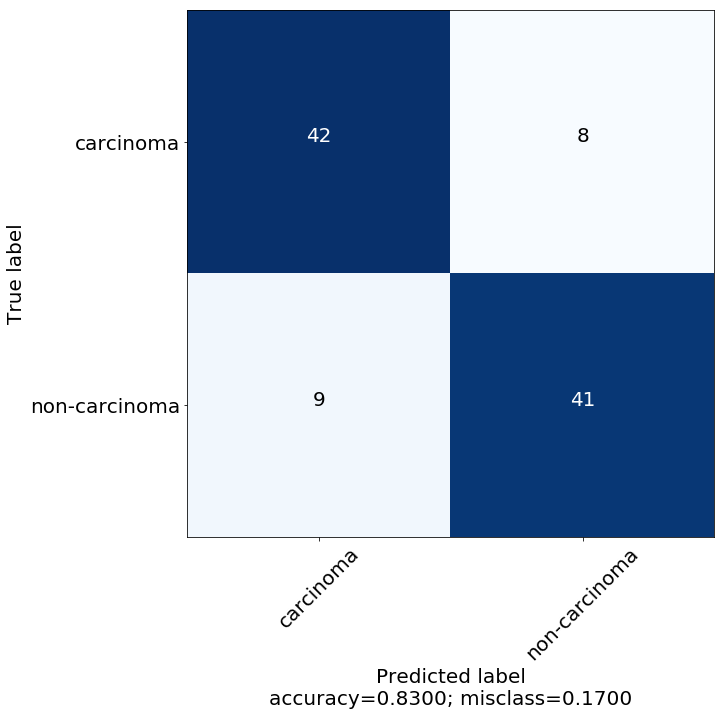

In [31]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

labels = []

label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

for k,v in indexlabel.items():
    labels.append(v)

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.savefig('plots/3.InceptionV3-2-Private-DataSet-CM.png', bbox_inches='tight', dpi = 100) 


plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels, title=' ')

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred=predictions
y_pred_probabilities=y_pred

# y_pred = np.argmax(y_pred,axis = 1) 
y_actual = y_true

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[42  8]
 [ 9 41]]
               precision    recall  f1-score   support

    carcinoma       0.82      0.84      0.83        50
non-carcinoma       0.84      0.82      0.83        50

  avg / total       0.83      0.83      0.83       100



In [33]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

Sensitivity :  82.35294117647058
Specificity :  83.6734693877551


In [34]:
print('roc_auc_score = ' + str(roc_auc_score(predictions, y_true)))

roc_auc_score = 0.8301320528211285


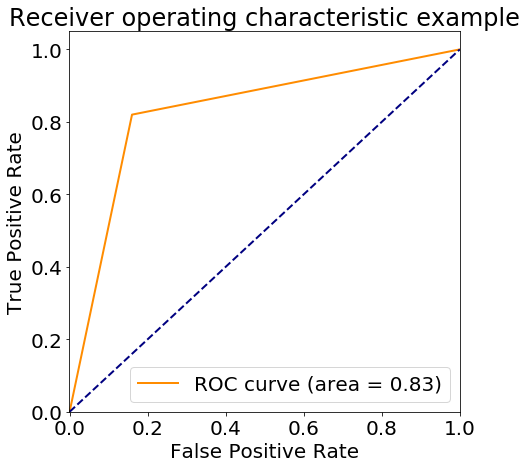

In [35]:
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-.001, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [36]:
predict = model.predict_proba(test_data, batch_size=batch_size, verbose=1)

100/100 [==============================] - 0s 0us/step


In [37]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y = label_binarize(test_labels, classes=[0, 1])
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [38]:
from scipy import interp
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

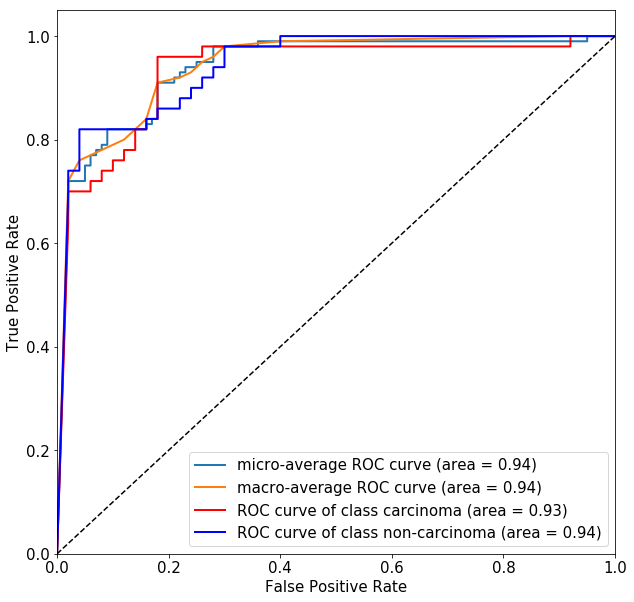

In [39]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from itertools import cycle
classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
    

plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)
plot_name = 'no variation'
colors = cycle(['red','blue','green','yellow','orange', 'aqua', 'cornflowerblue'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classnames[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [40]:
tn, fp, fn, tp = cm.ravel()

In [41]:
print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

Accuracy: 0.83
Precision: 0.8367346938775511
Recall: 0.82
tp: 41
fp: 8
tn: 42
fn: 9


In [42]:
print('F1 score:', f1_score(y_true, y_pred))

F1 score: 0.8282828282828283


In [43]:
recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

F1 score: 0.8282828282828283


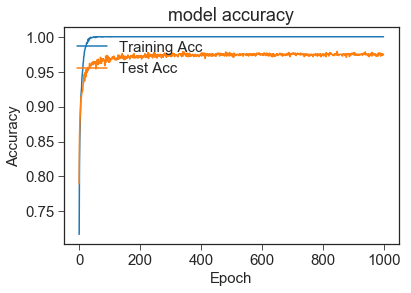

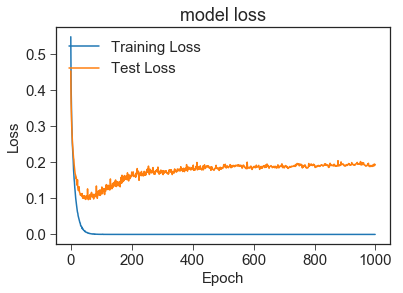

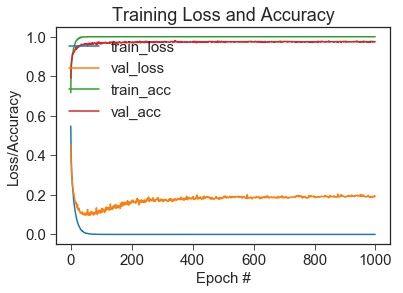

In [44]:
plt.style.use("seaborn-ticks")

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper left')
plt.show()

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")